In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# print(der_W1)
# print()
# print(der_W2)
# print()
# print(der_b1)
# print()
# print(der_b2)

# alfa=0.5

# W1_nuevo = W1 - np.mean(alfa * der_W1)
# W2_nuevo = W2 - np.mean(alfa * der_W2)
# b1_nuevo = b1 - np.mean(alfa * der_b1)
# b2_nuevo = b2 - np.mean(alfa * der_b2)

# print()
# print()
# print(W1_nuevo)
# print()
# print(W2_nuevo)
# print()
# print(b1_nuevo)
# print()
# print(b2_nuevo)

In [96]:
df_test= pd.read_excel('Real estate valuation data set.xlsx',  nrows=10)

x = df_test.iloc[:, 1:7].values.transpose().tolist()


for line in x:
    for i in range(len(line)):
        line[i] = (line[i] -min(line))/(max(line)-min(line))


x = np.array(x)
y = df_test.iloc[:, 7].values.tolist()
# for line in x:
#     line = (line -min(line))/(max(line)-min(line))

[[2012.9166667, 2012.9166667, 2013.5833333, 2013.5, 2012.8333333, 2012.6666667, 2012.6666667, 2013.4166667, 2013.5, 2013.4166667], [32.0, 19.5, 13.3, 13.3, 5.0, 7.1, 34.5, 20.3, 31.7, 17.9], [84.87882, 306.5947, 561.9845, 561.9845, 390.5684, 2175.03, 623.4731, 287.6025, 5512.038, 1783.18], [10.0, 9.0, 5.0, 5.0, 5.0, 3.0, 7.0, 6.0, 1.0, 3.0], [24.98298, 24.98034, 24.98746, 24.98746, 24.97937, 24.96305, 24.97933, 24.98042, 24.95095, 24.96731], [121.54024, 121.53951, 121.54391, 121.54391, 121.54245, 121.51254, 121.53642, 121.54228, 121.48458, 121.51486]]
[[0.27272729256195555, 0.9996688704673731, 1.0, 1.0, 0.9996688567112925, 0.9995860709263692, 0.9995860709263692, 0.9999586071075384, 1.0, 1.0], [0.9152542372881356, 0.5533686601059804, 0.37549031632232094, 0.37874565242060276, 0.13551871445319721, 0.20266510725642645, 1.0, 0.6388345527724546, 1.0, 1.0], [0.0, 0.05562274788381358, 0.10195584645824286, 0.10195584645824286, 0.07085734895151304, 0.39459633623715956, 0.11311117593891772, 0.052

In [98]:
def forward(W1, W2, b1, b2, x):
   
    f1 = np.dot(W1, x) + b1
    sigma = 1 / (1 + np.exp(-f1))
    f = np.dot(W2, sigma) + b2

    return f

def funcion_objetivo(x, y, W1, W2, b1, b2):


    loss = 0.5 * (np.power(forward(W1, W2, b1, b2, x) - y, 2)) 
    return loss

In [48]:
#Inicializacion de pesos
W1 = np.random.random((5,6))
b1 = np.random.random((5,1))

W2 = np.random.random((1,5))
b2 = np.random.random((1,1))



In [104]:
epsilon = 0.01
der_W1 = (funcion_objetivo(x, y, W1 + epsilon, W2, b1, b2) - funcion_objetivo(x, y, W1 - epsilon, W2, b1, b2)) / (2 * epsilon)
der_W2 = (funcion_objetivo(x, y, W1, W2 + epsilon, b1, b2) - funcion_objetivo(x, y, W1, W2 - epsilon, b1, b2)) / (2 * epsilon)
der_b1 = (funcion_objetivo(x, y, W1, W2, b1 + epsilon, b2) - funcion_objetivo(x, y, W1, W2, b1 - epsilon, b2)) / (2 * epsilon)
der_b2 = (funcion_objetivo(x, y, W1, W2, b1, b2 + epsilon) - funcion_objetivo(x, y, W1, W2, b1, b2 - epsilon)) / (2 * epsilon)  

# print(x)
# print()
# print(funcion_objetivo(x, y, W1, W2, b1, b2))
# print(funcion_objetivo(x, y, W1 + epsilon, W2, b1, b2))
# print(funcion_objetivo(x, y, W1 - epsilon, W2, b1, b2))

print(der_W1)
print()
print(der_W2)
print()
print(der_b1)
print()
print(der_b2)

alfa=0.5

W1_nuevo = W1 - np.mean(alfa * der_W1)
W2_nuevo = W2 - np.mean(alfa * der_W2)
b1_nuevo = b1 - np.mean(alfa * der_b1)
b2_nuevo = b2 - np.mean(alfa * der_b2)

print()
print()
print(W1_nuevo)
print()
print(W2_nuevo)
print()
print(b1_nuevo)
print()
print(b2_nuevo)



[[ 0.00787388 -0.01481445 -0.08145002 -0.14556186 -0.06797383  0.08092993
  -0.0028107  -0.02835196  0.02180256  0.00448136]]

[[  3.14173393 -18.34628226 -43.8508459  -81.34827783 -22.85905358
   32.13898572  -8.84382387 -40.84521013  98.6560298   82.15732396]]

[[ 0.0019663  -0.00321363 -0.01964909 -0.03494004 -0.01746892  0.02040968
  -0.00054953 -0.00604183  0.0041597   0.00074646]]

[[  0.62840136  -3.66934513  -8.77070974 -16.27061685  -4.57229029
    6.42835548  -1.76878     -8.16920891  19.73131987  16.43148525]]


[[2.33545161 1.79664809 2.49535827 1.92469108 1.82164096 2.09545069]
 [1.92892433 2.55900161 1.87682902 2.16060707 2.09787343 2.52740384]
 [2.14708539 2.36819474 1.73948964 1.90993954 2.21393819 2.03267366]
 [1.93355113 2.05116296 2.33741241 2.46293964 2.48198357 1.68757347]
 [1.75657674 1.7092649  2.53106631 1.9088567  2.54627361 2.05436103]]

[[6.88535183 7.50766925 7.55811228 7.35565978 7.07569294]]

[[1.13460333]
 [1.03730536]
 [0.66400016]
 [1.17540223]
 [1.2590

In [119]:
#Calculo del gradiente numerico

def funcion_objetivo(x, y, W1, W2, b1, b2):
    loss = 0.5 * (np.power(forward(W1, W2, b1, b2, x) - y, 2)) 
    return loss

def numerical_gradient(W1, W2, b1, b2, x, y, epsilon):
    #Tenemos que calcular el gradiente de la función objetivo en un punto, que equivale a computar las siguientes derivadas parciales respecto a cada elemento de las matrices W y los vectores b.

    der_W1 = (funcion_objetivo(x, y, W1 + epsilon, W2, b1, b2) - funcion_objetivo(x, y, W1 - epsilon, W2, b1, b2)) / (2 * epsilon)
    der_W2 = (funcion_objetivo(x, y, W1, W2 + epsilon, b1, b2) - funcion_objetivo(x, y, W1, W2 - epsilon, b1, b2)) / (2 * epsilon)
    der_b1 = (funcion_objetivo(x, y, W1, W2, b1 + epsilon, b2) - funcion_objetivo(x, y, W1, W2, b1 - epsilon, b2)) / (2 * epsilon)
    der_b2 = (funcion_objetivo(x, y, W1, W2, b1, b2 + epsilon) - funcion_objetivo(x, y, W1, W2, b1, b2 - epsilon)) / (2 * epsilon)  

    #me fijo si es todo 0.as_integer_ratio
    # if np.all(der_W1 == 0):
    #     print("der_W1 es 0")

    #Una vez que calculamos todos estos gradientes, podemos usarlos para actualizar la red. Hacemos esto restando una pequeña cantidad de cada derivada parcial al parámetro correspondiente. Esta cantidad es controlada por un parámetro llamado learning rate o tasa de aprendizaje. Es decir, para nuestro espacio de parámetros θ, calculamos:

    return der_W1, der_W2, der_b1, der_b2

In [122]:
#funcion fit y loop de entrenamiento
#Implementar el método fit() que realiza el ciclo de entrenamiento de la red. En cada iteración, se calcula el valor del gradiente promedio para todas las muestras del dataset y se actualizan los parámetros de la función utilizando esta dirección.

def fit(x, y, learning_rate=0.001, epochs=1000):
    #Inicializacion de pesos
    W1 = np.random.random((5,6))
    b1 = np.random.random((5,1))
    W2 = np.random.random((1,5))
    b2 = np.random.random((1,1))

    eps = 1e-6
    loss_accum = []
    for iteracion in range(epochs):
        der_W1, der_W2, der_b1, der_b2 = numerical_gradient(W1, W2, b1, b2, x, y, eps)
        W1 = W1 - learning_rate *np.mean(der_W1)
        W2 = W2 - learning_rate * np.mean(der_W2)
        b1 = b1 - learning_rate *np.mean( der_b1)
        b2 = b2 - learning_rate *np.mean( der_b2)
        
        loss_accum.append(np.mean(funcion_objetivo(x, y, W1, W2, b1, b2)))

    return loss_accum, W1, W2, b1, b2

In [101]:
def predict(x):
        y = forward(W1, W2, b1, b2, x)
        return y

[733.2400894509111, 730.4364324462289, 727.6372619663628, 724.8424601908965, 722.0519303038598, 719.2655957582481, 716.4833994897939, 713.7053030863368, 710.9312859213487, 708.1613442570391, 705.3954903249171, 702.6337513890207, 699.8761687998712, 697.1227970429829, 694.3737027891135, 691.6289639500949, 688.8886687467381, 686.1529147906327, 683.421808186519, 680.6954626564582, 677.9739986903298, 675.2575427249897, 672.5462263534222, 669.8401855674937, 667.1395600342564, 664.4444924071355, 661.7551276748336, 659.0716125447848, 656.3940948648338, 653.7227230813918, 651.0576457339272, 648.3990109857115, 645.7469661902496, 643.1016574916613, 640.4632294589187, 637.8318247532305, 635.2075838253309, 632.5906446446094, 629.9811424554804, 627.379209562067, 624.7849751386065, 622.1985650640303, 619.6201017804078, 617.0497041724005, 614.4874874676989, 611.933563155777, 609.3880389247729, 606.8510186145656, 604.3226021845281, 601.8028856958884, 599.2919613059294, 596.78991727407, 594.296837978822

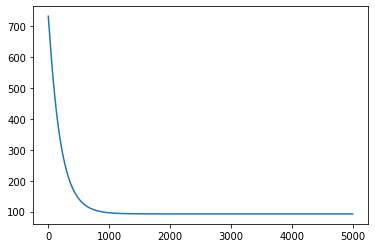

In [123]:
df_test= pd.read_excel('Real estate valuation data set.xlsx',  nrows=10000)

x = df_test.iloc[:, 1:7].values.transpose().tolist()


for line in x:
    for i in range(len(line)):
        line[i] = (line[i] -min(line))/(max(line)-min(line))


x = np.array(x)

# x = np.array(df_test.iloc[:, 1:7].values.tolist()).transpose()
y = df_test.iloc[:, 7].values.tolist()


loss, W1, W2, b1, b2 = fit(x, y, learning_rate=0.0001, epochs=5000)
print(loss)
print('maximo: ', max(loss))
print('minimo: ', min(loss))
print()
print(predict(x))
print()
print(y)

plt.plot(loss)